<a href="https://colab.research.google.com/github/gauravpks/ml-repo/blob/master/Part%202%20-%20Regression/Polynomial%20Regression/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

Special case of Multiple Linear Regression

HR Analytics example

#Intuition

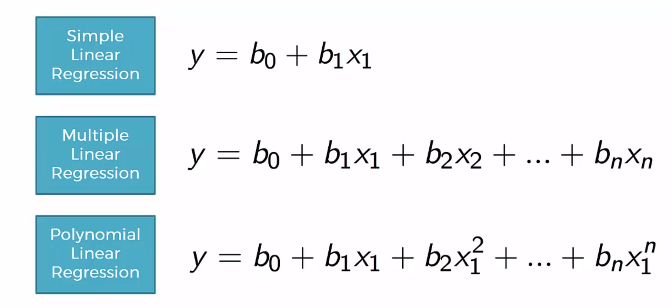

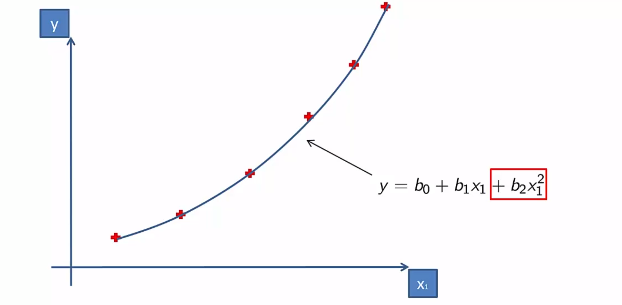

* Works well in cases like.. how diseases spread.. or population grows.. etc..

* Still a linear as we talk about the cofficient.. which are lineear

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('https://raw.githubusercontent.com/gauravpks/ml-repo/master/Part%202%20-%20Regression/Polynomial%20Regression/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

* Different salary of different position of previsious company

* A new hire asks 160000 saying.. his salary was high in the last company.. we will figure out.. if he is saying true

* Suppose is a Regional Manager from 5 Years.. so salary would be around 6 - 7 Level

* Use only level ( 2 columns only)

## Training the Linear Regression model on the whole dataset

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [16]:
from sklearn.preprocessing import PolynomialFeatures
#Check with n= 2 first
poly_reg = PolynomialFeatures(degree = 2) ## Not exactly a regressor..
X_poly = poly_reg.fit_transform(X) # transfor metrics of single feature to new metrics with x1, x1^2.. etc..
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y) # combinition of martix of powerered features and linear regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

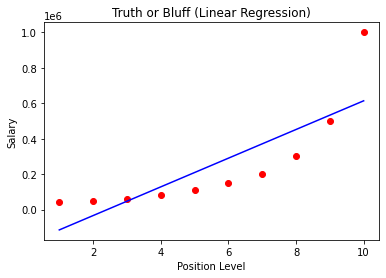

In [14]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

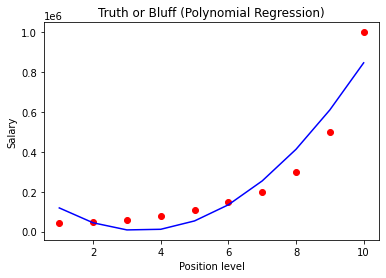

In [17]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

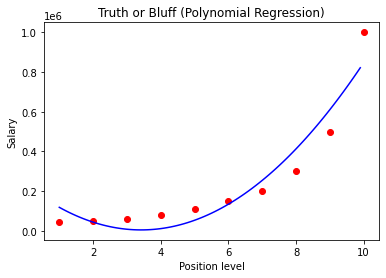

In [18]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [19]:
lin_reg.predict([[6.5]]) ## Observations needs to be an array like or sparse matrix

array([330378.78787879])

In [22]:
y_pred = lin_reg.predict(X)

In [24]:
from sklearn import metrics

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R2:', metrics.r2_score(y, y_pred))

Mean Absolute Error: 128454.54545454546
Mean Squared Error: 26695878787.878784
Root Mean Squared Error: 163388.73519272613
R2: 0.6690412331929895


## Predicting a new result with Polynomial Regression

In [26]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([189498.10606061])

In [27]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X))

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R2:', metrics.r2_score(y, y_pred))

Mean Absolute Error: 70218.1818181819
Mean Squared Error: 6758833333.333336
Root Mean Squared Error: 82212.12400451247
R2: 0.9162082221443942
